# Rating Prediction Project

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd

#Importing the libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Importing nltk Libraries
import nltk
from nltk.corpus import stopwords
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer

#Importing libraries for Evaluation Metrics
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, hamming_loss, log_loss

#Importing library to remove Outliers
from scipy.stats import zscore

#Importing library for model building
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\Ashwini\Documents\Amazon_Flipkart_Reviews.csv")

In [3]:
df

,Unnamed: 0,Review Title,Review Text,Ratings
0,0,Suitable for School kids,If you are a College student or a professional...,2.0 out of 5 stars
1,1,Misrepresentation on MS Office 2019 license - ...,Update after one month usage - MS Office 2019 ...,2.0 out of 5 stars
2,2,The sold me renewed laptop,It’s look like renewed laptop because laptop c...,2.0 out of 5 stars
3,3,Amazon dupes with specification/ battery sucks,&nbsp;I had seen the specifications and bought...,2.0 out of 5 stars
4,4,Low Quality and Low Battery performance,"Build Quality was Low, No match for the price....",2.0 out of 5 stars
...,...,...,...,...
35169,19392,Terrific purchase,Excellent monitor got it at great price of 720...,5
35170,19393,Worth the money,"Good, but rate high when compared",4
35171,19394,Excellent,Super Q,5
35172,19395,Simply awesome,Super se uper,5


* I have collected data by scrapping from amazon and flipkart. Our index is Unnamed: 0, let's removed that.

Feature Info:
    
    Review Title=Title of the review
    
    Review Text=Text content of the review
    
    Ratings=Ratings out of 5 Stars.

In [4]:
#Removed Unnamed: 0 Column from the dataset
df.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
df

,Review Title,Review Text,Ratings
0,Suitable for School kids,If you are a College student or a professional...,2.0 out of 5 stars
1,Misrepresentation on MS Office 2019 license - ...,Update after one month usage - MS Office 2019 ...,2.0 out of 5 stars
2,The sold me renewed laptop,It’s look like renewed laptop because laptop c...,2.0 out of 5 stars
3,Amazon dupes with specification/ battery sucks,&nbsp;I had seen the specifications and bought...,2.0 out of 5 stars
4,Low Quality and Low Battery performance,"Build Quality was Low, No match for the price....",2.0 out of 5 stars
...,...,...,...
35169,Terrific purchase,Excellent monitor got it at great price of 720...,5
35170,Worth the money,"Good, but rate high when compared",4
35171,Excellent,Super Q,5
35172,Simply awesome,Super se uper,5


In [6]:
df.head()

,Review Title,Review Text,Ratings
0,Suitable for School kids,If you are a College student or a professional...,2.0 out of 5 stars
1,Misrepresentation on MS Office 2019 license - ...,Update after one month usage - MS Office 2019 ...,2.0 out of 5 stars
2,The sold me renewed laptop,It’s look like renewed laptop because laptop c...,2.0 out of 5 stars
3,Amazon dupes with specification/ battery sucks,&nbsp;I had seen the specifications and bought...,2.0 out of 5 stars
4,Low Quality and Low Battery performance,"Build Quality was Low, No match for the price....",2.0 out of 5 stars


# Exploratory Data Analysis

In [7]:
# checking shapes 
df.shape

(35174, 3)

In [8]:
#Checking the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35174 entries, 0 to 35173
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review Title  33263 non-null  object
 1   Review Text   33251 non-null  object
 2   Ratings       33264 non-null  object
dtypes: object(3)
memory usage: 824.5+ KB


In [9]:
#Checking the columns names
df.columns

Index(['Review Title', 'Review Text', 'Ratings'], dtype='object')

In [10]:
#Checking the unique values in the dataset
df.nunique()

Review Title     7727
Review Text     17113
Ratings            10
dtype: int64

In [11]:
#Checking the data types
df.dtypes

Review Title    object
Review Text     object
Ratings         object
dtype: object

* All the columns is object data type.

In [12]:
#Checking the null values
df.isnull().sum()

Review Title    1911
Review Text     1923
Ratings         1910
dtype: int64

* In all the columns null value is present.

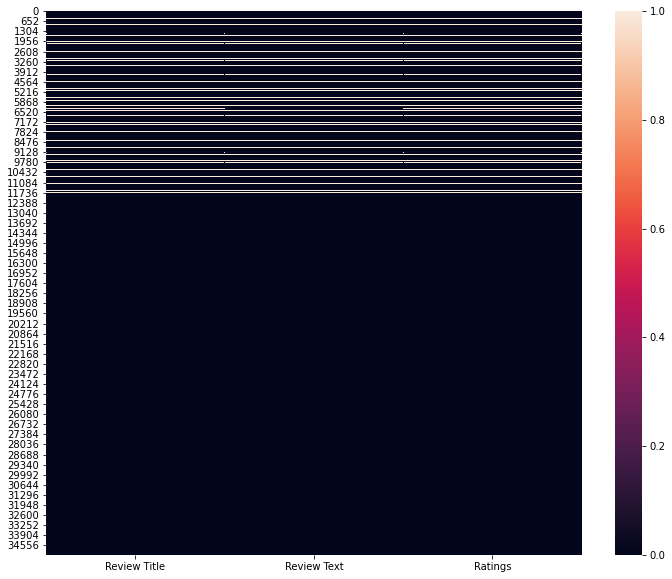

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull())
plt.show()

In [14]:
#Checking the count of Ratings
df['Ratings'].value_counts()

5                     13204
4                      4395
1                      3339
5.0 out of 5 stars     2189
1.0 out of 5 stars     2176
4.0 out of 5 stars     2034
3.0 out of 5 stars     1870
2.0 out of 5 stars     1728
3                      1481
2                       848
Name: Ratings, dtype: int64

In [15]:
#Checking the mode in Review title
df['Review Title'].mode()

0    Wonderful
dtype: object

* In Review Title "Wonderful" is frequently repeated.

In [16]:
#Checking the mode in Review Text
df['Review Text'].mode()

0    Good
dtype: object

* In Review Text "Good" is frequently repeated.

In [17]:
#Checking the mode in Ratings
df['Ratings'].mode()

0    5
dtype: object

In [18]:
#Lets replace the nan with mode of each columns
df['Review Title']=df['Review Title'].fillna(df['Review Title'].mode()[0])
df['Review Text']=df['Review Text'].fillna(df['Review Text'].mode()[0])
df['Ratings']=df['Ratings'].fillna(df['Ratings'].mode()[0])

In [19]:
#Checking the null value after replaced with mode
df.isnull().sum()

Review Title    0
Review Text     0
Ratings         0
dtype: int64

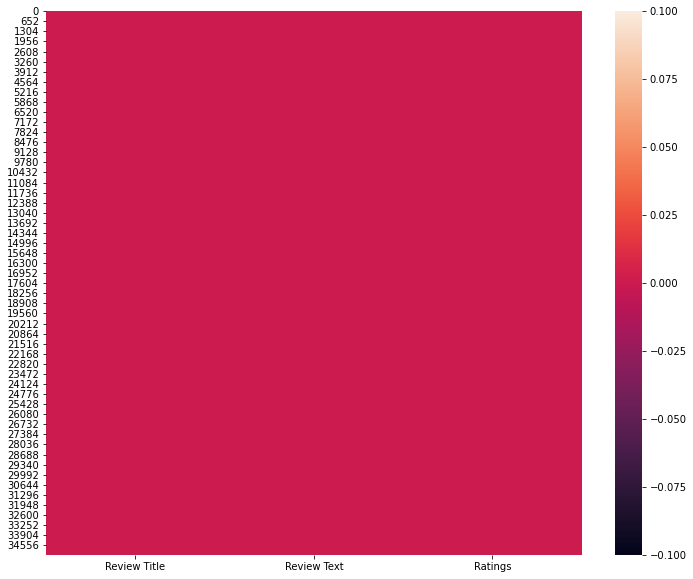

In [20]:
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull())
plt.show()

* We have replaced the null value with mode. Now data looks good. There is no null value present in the dataset.

In [21]:
#Checking the unique values in Ratings
df['Ratings'].unique()

array(['2.0 out of 5 stars', '5', '3.0 out of 5 stars',
       '1.0 out of 5 stars', '5.0 out of 5 stars', '4.0 out of 5 stars',
       '4', '3', '1', '2'], dtype=object)

In [22]:
#Let's remove the .0 out of 5 stars from the data the Ratings dataset
df['Ratings'] = df['Ratings'].replace('1.0 out of 5 stars',1)
df['Ratings'] = df['Ratings'].replace('2.0 out of 5 stars',2)
df['Ratings'] = df['Ratings'].replace('3.0 out of 5 stars',3)
df['Ratings'] = df['Ratings'].replace('4.0 out of 5 stars',4)
df['Ratings'] = df['Ratings'].replace('5.0 out of 5 stars',5)

In [23]:
#Let's change the Ratings data type to int
df['Ratings']=df['Ratings'].astype('int')

In [24]:
df['Ratings'].dtype

dtype('int32')

In [25]:
#Checking the sample data
df.sample(15)

,Review Title,Review Text,Ratings
15601,Great product,The quality of the keys are very good . The we...,5
34333,Best in the market!,Display travelled long distance 1000 km to rea...,5
21325,Great Phone @ affordable price,The look and feel of the phone was really good...,5
5319,Boat makes the best value Products that only l...,[BIG UPDATE]<br> IT BROKE ALONG THE RIGHT HING...,2
33959,Very Good,Excellent Product.,4
12337,Fabulous!,Mind blowing purchase.,5
7608,Not durable,"Not durable, got faulty within 2 months",2
11262,Headphone is good but there is some problems,"* Best Headphone for Seeing films in mobile,to...",4
12285,Best in the market!,Easy to use. Performance is good only. Designi...,5
9859,Wonderful,Good,5


In [26]:
#Let's combine the Review Title and Review Text
df['Review']=df['Review Title'].map(str)+ ' '+df['Review Text']
df

,Review Title,Review Text,Ratings,Review
0,Suitable for School kids,If you are a College student or a professional...,2,Suitable for School kids If you are a College ...
1,Misrepresentation on MS Office 2019 license - ...,Update after one month usage - MS Office 2019 ...,2,Misrepresentation on MS Office 2019 license - ...
2,The sold me renewed laptop,It’s look like renewed laptop because laptop c...,2,The sold me renewed laptop It’s look like rene...
3,Amazon dupes with specification/ battery sucks,&nbsp;I had seen the specifications and bought...,2,Amazon dupes with specification/ battery sucks...
4,Low Quality and Low Battery performance,"Build Quality was Low, No match for the price....",2,Low Quality and Low Battery performance Build ...
...,...,...,...,...
35169,Terrific purchase,Excellent monitor got it at great price of 720...,5,Terrific purchase Excellent monitor got it at ...
35170,Worth the money,"Good, but rate high when compared",4,"Worth the money Good, but rate high when compared"
35171,Excellent,Super Q,5,Excellent Super Q
35172,Simply awesome,Super se uper,5,Simply awesome Super se uper


* We have combined the Review Title and Review Text into single column named as Review. Let's drop the Review title and Review Text from the dataset.

In [27]:
df.drop(columns=['Review Title','Review Text'],inplace=True)

In [28]:
df.head(10)

,Ratings,Review
0,2,Suitable for School kids If you are a College ...
1,2,Misrepresentation on MS Office 2019 license - ...
2,2,The sold me renewed laptop It’s look like rene...
3,2,Amazon dupes with specification/ battery sucks...
4,2,Low Quality and Low Battery performance Build ...
5,2,Disappointed Below average display and low bui...
6,2,Display back light issue Display gone with 2 m...
7,2,"Laptop is ok, battery is really bad Battery is..."
8,2,No for professional works Blue screen while po...
9,2,monitor power issue monitor is not turning on ...


In [29]:
df.head(9)

,Ratings,Review
0,2,Suitable for School kids If you are a College ...
1,2,Misrepresentation on MS Office 2019 license - ...
2,2,The sold me renewed laptop It’s look like rene...
3,2,Amazon dupes with specification/ battery sucks...
4,2,Low Quality and Low Battery performance Build ...
5,2,Disappointed Below average display and low bui...
6,2,Display back light issue Display gone with 2 m...
7,2,"Laptop is ok, battery is really bad Battery is..."
8,2,No for professional works Blue screen while po...


In [30]:
#Checking the top 10 Review
df['Review'][0:10]

0    Suitable for School kids If you are a College ...
1    Misrepresentation on MS Office 2019 license - ...
2    The sold me renewed laptop It’s look like rene...
3    Amazon dupes with specification/ battery sucks...
4    Low Quality and Low Battery performance Build ...
5    Disappointed Below average display and low bui...
6    Display back light issue Display gone with 2 m...
7    Laptop is ok, battery is really bad Battery is...
8    No for professional works Blue screen while po...
9    monitor power issue monitor is not turning on ...
Name: Review, dtype: object

In [31]:
#Let's apply the regular expression to make the contracted words to full form words, removing url and unwanted text
def decontracted(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don’t", "do not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"im ", "i am", text)
    text = re.sub(r"yo ", "you ",text)
    text = re.sub(r"doesn’t", "does not",text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"<br>", " ", text)
    text = re.sub(r'http\S+', '', text) #removing urls
    return text

In [32]:
#Converting the Review to lower case
df['Review']=df['Review'].apply(lambda x: x.lower())

In [33]:
df['Review'].head() #We have converted to lower case

0    suitable for school kids if you are a college ...
1    misrepresentation on ms office 2019 license - ...
2    the sold me renewed laptop it’s look like rene...
3    amazon dupes with specification/ battery sucks...
4    low quality and low battery performance build ...
Name: Review, dtype: object

In [34]:
#Removing the puntuation
df['Review']=df['Review'].str.replace('[^\w\s\n]','')

In [35]:
df['Review'][2]

'the sold me renewed laptop its look like renewed laptop because laptop charging jack is loose and left side speaker sounds like its tear bad sound quality  and finger sensor quality look like 2011 touch phone of wing and any chinese phone touch waste of money and one more thing day by day amazon product quality getting poor'

In [41]:
df['Review'][1] #Removed the stop words, punctuation from review

'misrepresentation on ms office 2019 license  it is one month trial update after one month usage  ms office 2019 preinstalled edition became unlicensed version within 30 days and refused to activate hp support shared their product sheet that stated that this laptop came only with a trial version of ms office 2019 now i am chasing seller appario retail to honour the commitmentbrbrbad experience after paying high price around 67000 for preinstalled genuine softwarebrbrother wise product has sleek looks superfast fingerprint scanner very good display very responsive touchpad decent but tinny speakers usb c and barrel plug charging options and under 10 second boot up ssd drive preloaded with win10 home and ms office not sure whether trial or full version drawbacks  weighs 142 kg base gets warm rather quickly and so does the power adapter decent for a college student'

In [42]:
#Noice removal
def scrub_words(text):
    #remove html markup
    text = re.sub("(<.*?>)", "", text)
    #remove non-ascii and digits
    text = re.sub("(\\W)", " ", text)
    text = re.sub("(\\d)", "", text)
    #remove white space
    text = text.strip()
    return text

In [43]:
df['Review']=df['Review'].apply(lambda x:scrub_words(x))

In [44]:
df['Review'][0]

'suitable for school kids if you are a college student or a professional who depends heavily on laptop for pretty much everyday then  this laptop is not for you it hangs more often than it runs cannot install essential computer science software such as eclipse or android studio because then this laptop just diesbrbri took this laptop thinking that it will have good performance based on its configurationbrbrbut if you are someone who wants to attend online classes or just browse then you may go for this laptop'

In [45]:
#Checking the count of Word from Review
df['Review_wordcount']=df['Review'].apply(lambda x: len(str(x).split(' ')))

In [46]:
df

,Ratings,Review,Review_wordcount
0,2,suitable for school kids if you are a college ...,89
1,2,misrepresentation on ms office license it is...,144
2,2,the sold me renewed laptop its look like renew...,59
3,2,amazon dupes with specification battery sucks ...,37
4,2,low quality and low battery performance build ...,43
...,...,...,...
35169,5,terrific purchase excellent monitor got it at ...,16
35170,4,worth the money good but rate high when compared,9
35171,5,excellent super q,3
35172,5,simply awesome super se uper,5


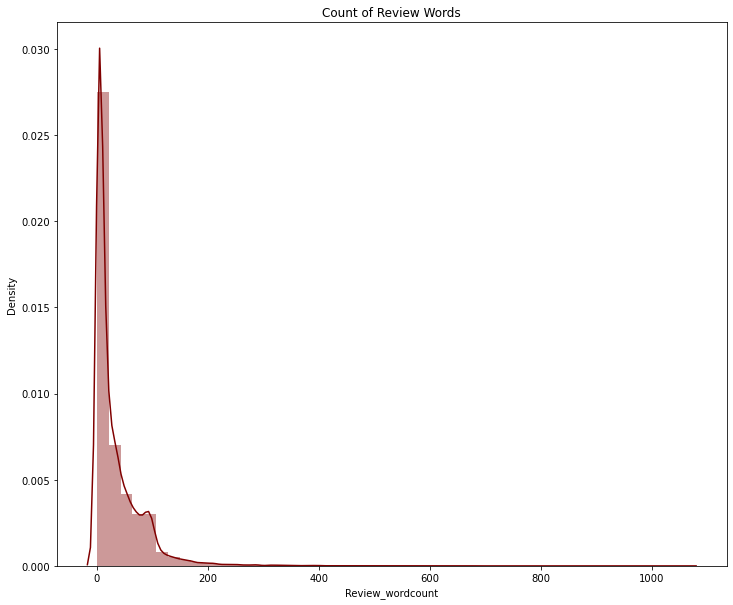

In [47]:
#Visualizing the count of words using the distribution plot
plt.figure(figsize=(12,10))
sns.distplot(df['Review_wordcount'],color='Maroon',hist=True)
plt.title("Count of Review Words")
plt.show()

* In the above distribution plot we see that our words lie in the range 0-200. Most of the reviews are lengthy that can act as an Outliers.

In [48]:
#Checking the count of character in reviews
df['Review_countchar']=df['Review'].str.len()
df

,Ratings,Review,Review_wordcount,Review_countchar
0,2,suitable for school kids if you are a college ...,89,513
1,2,misrepresentation on ms office license it is...,144,847
2,2,the sold me renewed laptop its look like renew...,59,321
3,2,amazon dupes with specification battery sucks ...,37,206
4,2,low quality and low battery performance build ...,43,253
...,...,...,...,...
35169,5,terrific purchase excellent monitor got it at ...,16,87
35170,4,worth the money good but rate high when compared,9,48
35171,5,excellent super q,3,17
35172,5,simply awesome super se uper,5,28


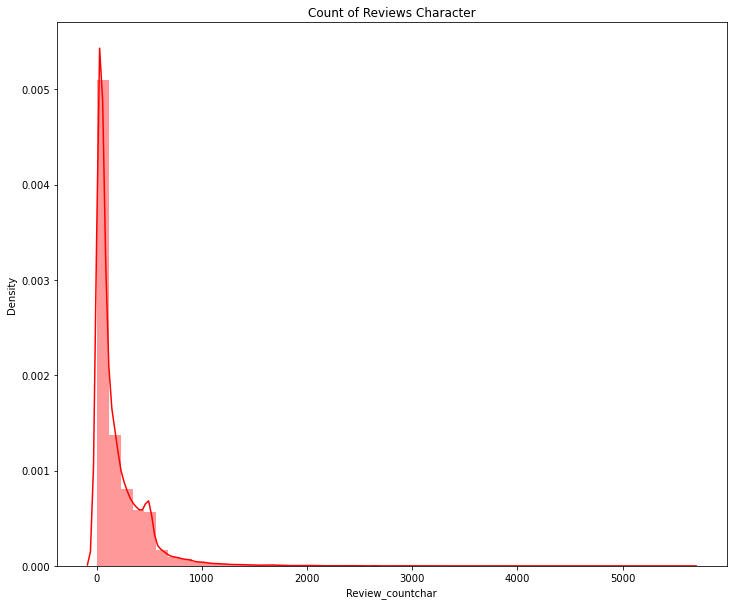

In [49]:
#Visualizing the count of characters using the distribution plot
plt.figure(figsize=(12,10))
sns.distplot(df['Review_countchar'],color='red',hist=True,kde=True)
plt.title("Count of Reviews Character")
plt.show()

* We see the most of the character lies in the range 0-100. Most of review's characters are lengthy.

# Removing Outliers

In [50]:
df.shape #Checking the shape before removing the outliers

(35174, 4)

In [51]:
from scipy import stats
z_score=zscore(df[['Review_wordcount']])
outliers=np.abs(z_score)
outliers

array([[1.15901315],
       [2.31814554],
       [0.52675912],
       ...,
       [0.6534484 ],
       [0.61129813],
       [0.59022299]])

In [52]:
df_new= (outliers < 3).all(axis = 1)
df=df[df_new]

In [54]:
df.shape

(34600, 4)

In [55]:
outlier=((35174-34611)/35174)*100
round(outlier,2)

1.6

In [56]:
outlier=((35174-34611)/35174)*100
round(outlier,2)

1.6

* 2% of data removed during the outliers removal process.

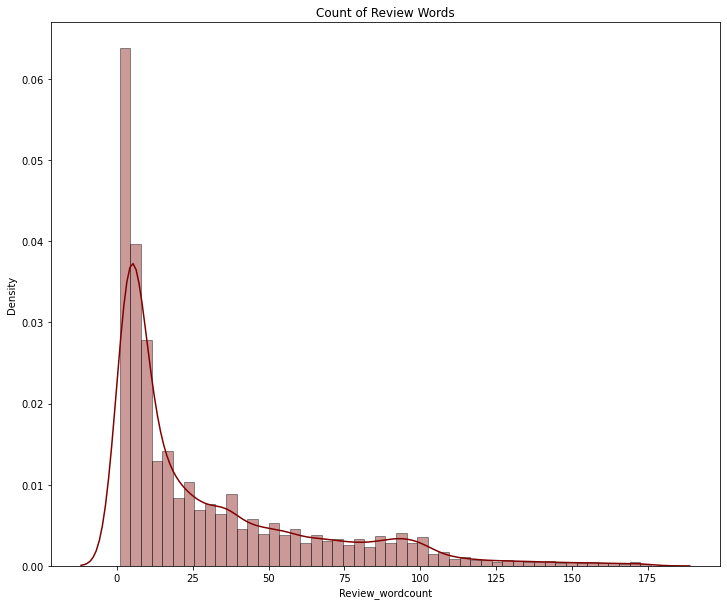

In [57]:
#Visualizing the count of words using the distribution plot after removing the outliers
plt.figure(figsize=(12,10))
sns.distplot(df['Review_wordcount'],color='Maroon',hist=True,hist_kws={'edgecolor':'black'})
plt.title("Count of Review Words")
plt.show()

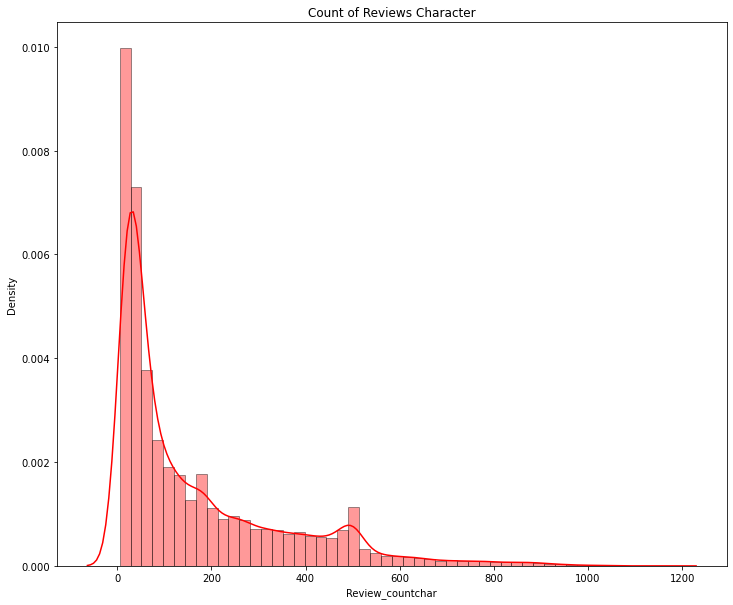

In [58]:
#Visualizing the count of characters using the distribution plot after removing the outliers
plt.figure(figsize=(12,10))
sns.distplot(df['Review_countchar'],color='red',hist=True,kde=True,hist_kws={'edgecolor':'black'})
plt.title("Count of Reviews Character")
plt.show()

* We clearly see that we have removed the outliers from the Review.